## TP 5 : " Stokes Flow ".

---
Binôme : Khaled Ibrahim & Servranckx Christophe.

---


#### Résolution des équations :

$$
\left\{
\begin{array}{}
\Delta \omega = 0    \hspace{3.0cm}  (1)\\
\Delta \psi = \omega \hspace{3.0cm}  (2)
\end{array}
\right.
$$


* Pour l'équation (1):

\begin{equation}
\Delta \omega = 0 \hspace{1.0cm} → \hspace{1.0cm} \frac{\partial ^2 \omega}{\partial x^2} + \frac{\partial ^2 \omega}{\partial y^2} = 0
\end{equation}

\begin{equation}
→ \frac{\omega_{i+1, j}  - 2\omega_{i,j}  + \omega_{i-1,j} }{\Delta x^2} + \frac{\omega_{i,j+1}  - 2\omega_{i,j}  + \omega_{i, j-1} }{\Delta y^2} = 0
\end{equation}

\begin{equation}
→ \omega_{i+1, j}   + \omega_{i-1,j} + \omega_{i,j+1}  + \omega_{i, j-1}- 4 \omega_{i,j} = 0
\end{equation}

\begin{equation}
→ \omega^{k+1}_{i,j} = \frac{1}{4} \left(\omega^{k}_{i,j-1} + \omega^k_{i,j+1} + \omega^{k}_{i-1,j} + \omega^k_{i+1,j} \right)
\end{equation}


* Pour l'équation (2):

\begin{equation}
\Delta \psi = \omega \hspace{1.0cm} → \hspace{1.0cm} \frac{\partial ^2 \psi}{\partial x^2} + \frac{\partial ^2 \psi}{\partial y^2} = \omega
\end{equation}

\begin{equation}
→ \omega_{i,j}^{k} = \frac{\psi_{i+1,j}^{k}-2\psi_{i,j}^{k}+\psi_{i-1,j}^{k}}{\Delta x^2}+\frac{\psi_{i,j+1}^{k}-2 \psi_{i,j}^{k}+\psi_{i,j-1}^{k}}{\Delta y^2}
\end{equation}


$$
\begin{array}{}
→ \psi_{i,j}^{k+1} = \frac{(\psi_{i+1,j}^{k}+\psi_{i-1,j}^{k})\Delta y^2+(\psi_{i,j+1}^{k}+\psi_{i,j-1}^{k})\Delta x^2-\omega_{i,j}^{k}\Delta x^2\Delta y^2}{2(\Delta x^2+\Delta y^2)}
\end{array}
$$

$$
{}
$$

#### Conditions aux bords :

Pour l'éq. (1) :

$$
\begin{array}{}
\omega_{i,j} = -\frac{1}{2 \Delta y^2} (8\psi_{i, j-1} - \psi_{i, j-2}) - \frac{3u_j}{\Delta y} + \mathcal{O}(\Delta y^2)
\end{array}
$$

où

$$
\begin{array}{}
u_j = \left.\frac{\partial \psi}{\partial y}\right|_j 
\end{array}
$$

Pour l'éq. (2) :

* Conditions aux bords de Neumann :

$$
\left\{
\begin{array}{}
\frac{\partial \psi}{\partial x} = 0 \hspace{1.0cm} \text{en $x = 0$}\\
\frac{\partial \psi}{\partial x} = 0 \hspace{1.0cm} \text{en $x = l$}\\
\frac{\partial \psi}{\partial y} = 0 \hspace{1.0cm} \text{en $y = 0$}\\
\frac{\partial \psi}{\partial y} = 1 \hspace{1.0cm} \text{en $y = h$}\\
\end{array}
\right.
$$

Ce qui nous donne, respectivement, par discrétisation des dérivées :

$$
\left\{
\begin{array}{}
\frac{\partial \psi}{\partial x} \approx \frac{\psi_{beg,j} - \psi_{beg+1,j}}{\Delta x} = 0 \mbox{ } → \mbox{ } \psi_{beg,j} = \psi_{beg+1,j}\\
\frac{\partial \psi}{\partial x} \approx \frac{\psi_{end,j} - \psi_{end-1,j}}{\Delta x} = 0 \mbox{ } → \mbox{ } \psi_{end,j} = \psi_{end-1,j}\\
\frac{\partial \psi}{\partial y} \approx \frac{\psi_{i,beg} - \psi_{i,beg+1}}{\Delta y} = 0 \mbox{ } → \mbox{ } \psi_{i,beg} = \psi_{i,beg+1}\\
\frac{\partial \psi}{\partial y} \approx \frac{\psi_{i,end} - \psi_{i,end-1}}{\Delta y} = 1 \mbox{ } → \mbox{ } \psi_{i,end} = \Delta y + \psi_{i,end-1}
\end{array}
\right.
$$

$$
\text{Soient :} \hspace{1.0cm}
\left\{
\begin{array}{}
\psi_{beg,j} = \psi_{beg+1,j} \\
\psi_{end,j} = \psi_{end-1,j} \\
\psi_{i,beg} = \psi_{i,beg+1} \\
\psi_{i,end} = \Delta y + \psi_{i,end-1}  
\end{array}
\right.
$$

* Conditions aux bords de Dirichlet :

$$
\psi =
\left\{
\begin{array}{}
0 \hspace{1.0cm} \text{en $x = 0$}\\
0 \hspace{1.0cm} \text{en $x = l$}\\
0 \hspace{1.0cm} \text{en $y = 0$}\\
0 \hspace{1.0cm} \text{en $y = h$}\\
\end{array}
\right.
$$

In [13]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import pyplot, cm
from math import pi
import numpy
%matplotlib inline
from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 16

In [14]:
def L1norm(psid, psi):
    norm = numpy.sum(numpy.abs(psid-psi))
    return norm

To later examine the convergence of the iterative process, we will save the L2-norm of the difference between successive solutions.

In [31]:
def laplace2d(om, psi, dx, dy, l1_target):
    '''Iteratively solves the Laplace equation using the Jacobi method
    
    Parameters:
    ----------
    om: 2D array of float
        Initial potential distribution
    l2_target: float
        target for the difference between consecutive solutions
        
    Returns:
    -------
    om: 2D array of float
        Potential distribution after relaxation
    '''
    
    lnorm = 1

    omn = numpy.empty_like(om)
    iterations = 0
    l1_conv=[]
    
    while lnorm > l1_target:
        omn = om.copy()
        psid = psi.copy()
        
        om[1:-1,1:-1] = .25 * (omn[1:-1,2:] + omn[1:-1, :-2] \
                              + omn[2:, 1:-1] + omn[:-2, 1:-1])
    

        psi[1:-1,1:-1] = 1/(2*(dx**2 + dy**2)) * \
                        ((psid[1:-1,2:]+psid[1:-1,:-2])*dy**2 +\
                        (psid[2:,1:-1] + psid[:-2,1:-1])*dx**2 -\
                         om[1:-1,1:-1]*dx**2*dy**2)

        # On impose des conditions aux bords de Neumann
        
        # Bord supérieur
        om[-1,:] = -(1/(2*dy**2))*(8*psi[-1, :]-psi[-2, :])-(3/dy) 
        psi[-1,:] = psi[-2,:]
                                                                       
        # Bord inférieur
        psi[0,:]  = psi[1,:]
        
        # Bord droit
        psi[:,-1] = psi[:,-2]
        
        # Bord gauche
        psi[:,0]  = psi[:,1]
        
        #Calcul et sauvegarde de la norme L1
        lnorm = L1norm(psid,psi)
        iterations += 1
        l1_conv.append(lnorm)
    
    print('Number of Jacobi iterations: {0:d}'.format(iterations))
    return psi, l1_conv

In [32]:
def plot_3D(x, y, psi):
    '''Creates 3D plot with appropriate limits and viewing angle
    
    Parameters:
    ----------
    x: array of float
        nodal coordinates in x
    y: array of float
        nodal coordinates in y
    psi: 2D array of float
        calculated potential field
    
    '''
    fig = pyplot.figure(figsize=(11,7), dpi=100)
    ax = fig.gca(projection='3d')
    X,Y = numpy.meshgrid(x,y)
    surf = ax.plot_surface(X,Y,psi[:], rstride=1, cstride=1, cmap=cm.viridis,
            linewidth=0, antialiased=False)

    ax.set_xlim(0,1)
    ax.set_ylim(0,1)
    ax.set_xlabel('$x$')
    ax.set_ylabel('$y$')
    ax.set_zlabel('$z$')
    ax.view_init(30,45)

In [33]:
nx = 41
ny = 41

l = 1.
h = 1.

dx = l/(nx-1)
dy = h/(ny-1)

l1_target = 1e-6

#Conditions initiales
psi = numpy.zeros((ny,nx)) ##
om  = numpy.zeros((ny,nx))

#plotting aids
x = numpy.linspace(0,1,nx)
y = numpy.linspace(0,1,ny)

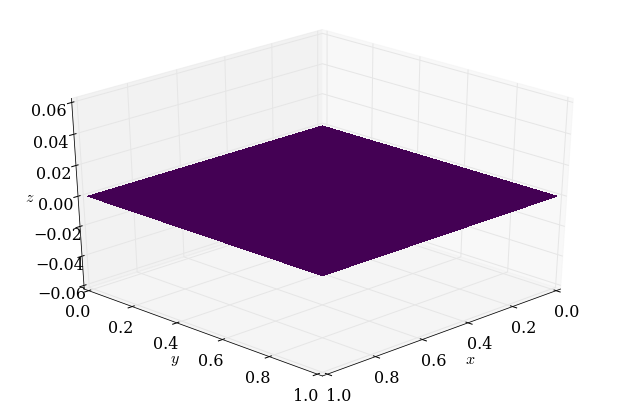

In [34]:
plot_3D(x,y,psi)

In [35]:
psi = laplace2d(om.copy(), psi.copy(), dx, dy, l1_target)

Number of Jacobi iterations: 1


ValueError: shape mismatch: objects cannot be broadcast to a single shape

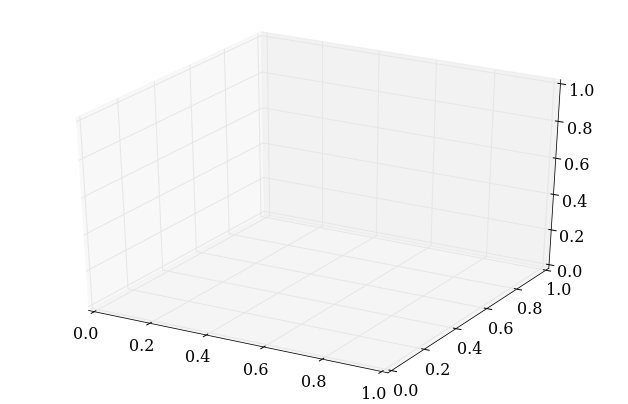

In [36]:
plot_3D(x,y,psi)

---

##### . Sources
---

---
###### La cellule ci-dessous charge le style du notebook.

In [1]:
from IPython.core.display import HTML
css_file = '../styles/numericalmoocstyle.css'
HTML(open(css_file, "r").read())